## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('fivethirtyeight')

## Buscando dados

In [27]:
inicio = datetime.datetime(2019, 1, 1)
fim = datetime.datetime(2021, 12, 31)

tickers = ['PETR4.SA', '^BVSP']
dados = pd.DataFrame()

for i in tickers:
    dados[i] = yf.download(i, start=inicio, end=fim, interval='1wk')['Adj Close']

dados.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PETR4.SA,^BVSP
Date,,
2019-01-01,19.751621,91699.0
2019-01-08,19.547102,94474.0
2019-01-15,20.081991,96010.0
2019-01-22,19.484175,95444.0
2019-01-29,20.475292,98589.0


## Beta: yfinance

In [28]:
beta = yf.Ticker("PETR4.SA")

In [29]:
beta.info['beta']

1.34646

## Retorno simples

In [30]:
retorno_simples = np.log(dados / dados.shift()).dropna()
retorno_simples.tail()

,PETR4.SA,^BVSP
Date,,
2021-11-22,0.111525,0.006753
2021-11-29,-0.019877,0.038589
2021-12-13,-0.045470,-0.022251
2021-12-20,0.020735,0.004854
2021-12-27,-0.008734,-0.006741


## Beta: CAPM - Capital Asset Pricing Model

In [34]:
#Dados da Selic

url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=json'

selic_meta = pd.read_json(url)

#Adaptando a base de dados

selic_meta['data'] = pd.to_datetime(selic_meta['data'], dayfirst=True)
selic_meta.set_index('data', inplace=True)
selic_meta.tail()

,valor
data,
2022-01-29,9.25
2022-01-30,9.25
2022-01-31,9.25
2022-02-01,9.25
2022-02-02,9.25


In [39]:
#Ativo livre de risco

rf = selic_meta.iloc[-1]
rf

retorno_simples['Selic'] = 0

for i in retorno_simples['Selic']:
    retorno_simples['Selic'] = rf[0]
    
retorno_simples.head()

,PETR4.SA,^BVSP,Selic
Date,,,
2019-01-08,-0.010409,0.029813,9.25
2019-01-15,0.026996,0.016128,9.25
2019-01-22,-0.030221,-0.005913,9.25
2019-01-29,0.049616,0.032420,9.25
2019-02-05,-0.046794,-0.043281,9.25


In [46]:
#Utilizando a biblioteca Statsmodels

y = retorno_simples['PETR4.SA']
x = retorno_simples['^BVSP']
#c = retorno_simples['Selic']

X = sm.add_constant(x)
resultado = sm.OLS(y, X).fit()

In [62]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:               PETR4.SA   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     251.9
Date:                Fri, 07 Jan 2022   Prob (F-statistic):           1.34e-33
Time:                        13:56:22   Log-Likelihood:                 255.89
No. Observations:                 148   AIC:                            -507.8
Df Residuals:                     146   BIC:                            -501.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.004      0.089      0.9

In [49]:
#Utilizando a biblioteca Sklearn

X = x.values.reshape(-1, 1)

In [50]:
#Estimação do modelo

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [51]:
#R-square

reg.score(X, y)

0.6331166901962169

In [52]:
#Intercepto

reg.intercept_

0.0003147486486581231

In [53]:
#Coeficiente

reg.coef_[0]

1.3995459214374033

In [54]:
#Previsão do modelo

y_chapeu = reg.predict(X)

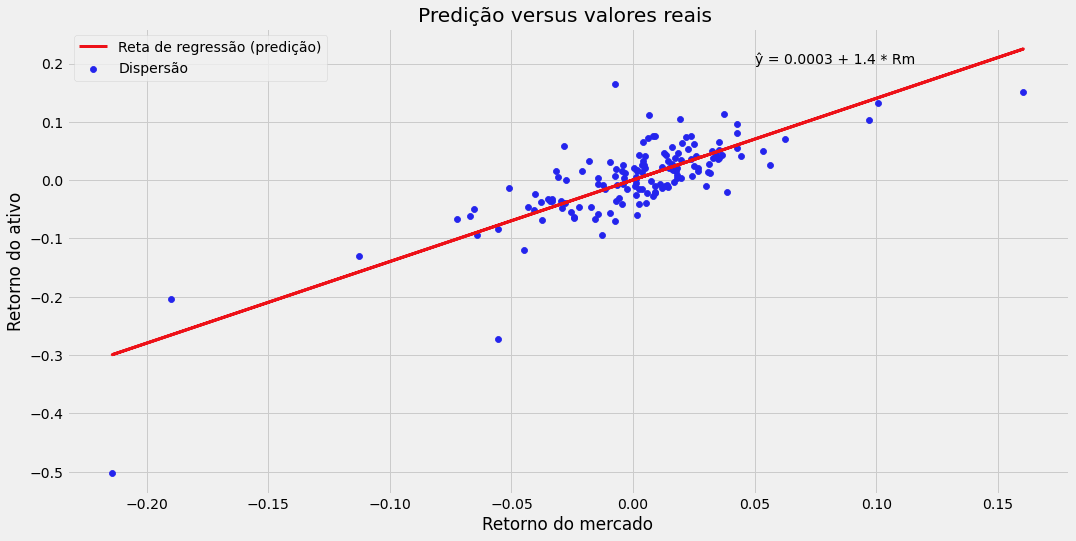

In [59]:
#Visualização

plt.figure(figsize=(16, 8));
plt.plot(x, y_chapeu, label='Reta de regressão (predição)', color='#ed1118', linewidth=3);
plt.scatter(x, y, label='Dispersão', color='#2424ed', linewidth=0.8);
plt.title('Predição versus valores reais ');
plt.ylabel('Retorno do ativo');
plt.xlabel('Retorno do mercado');
plt.text(0.05, 0.2, f'ŷ = {np.round(reg.intercept_, 4)} + {np.round(reg.coef_[0], 3)} * Rm');
plt.legend();

SCRIPT FINALIZADO!